In [67]:
# Initialize OK
from client.api.notebook import Notebook
ok = Notebook('lab11.ok')

Assignment: lab11
OK, version v1.13.11



# Lab 11: Use Bootstrap to Estimate Mean and Variance
**Collaboration Policy**

Data science is a collaborative activity. While you may talk with others about
the homework, we ask that you **write your solutions individually**. If you do
discuss the assignments with others please **include their names** at the top
of your solution.

## Due Date

This assignment is due at 11:59pm Wednesday, April 24th.

## Introduction

In this lab, you will examine the bootstrap in greater detail. The goal is to develop a functional approach to bootstrapping any statistic for any sample.

## Collaborators  

Write names in this cell:

In [68]:
# Run this cell to set up your notebook

import seaborn as sns
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

from IPython.display import display, Latex, Markdown


## The Bootstrap Procedure

The bootstrap is a very simple process: 
* Sample with replacement from the original sample (now the **bootstrap population**). These samples are called **bootstrap samples**. We typically take thousands of bootstrap samples (~10,000 is common).
* Calculate the statistic of interest for each bootstrap sample. This statistic is called the **bootstrap statistic**, and the empirical distribution of these bootstrap statistics is an approximation to the **sampling distribution** of the bootstrapped statistic.

But why bootstrap instead of just calculating the statistic of interest once on the whole sample? 

Take sample mean estimator as an example. Suppose $\{x_i\}$ are samples coming from an unknown distribution. We can use sample mean $\bar{X} = \frac{1}{n}\sum_{i=1}^n x_i$ to estimate the the mean of the population. However, if we obtain another sample set $\{x_i\}$, we can get very different results. Therefore, computing the sampling distribution (distribution of the sample mean for all possible sample sets) would be very helpful. From such distribution, we can obtain the variance of the estimator: $E[E(\bar{X})-\bar{X}]^2$.

In order to compute the sampling distribution of $\bar{X}$, we could directly use sampling methods. But that requires us to obtain several different sets of samples $\{x_i\}$ directly from the population. If we have $m$ sets of samples and each set contains $n$ subjects (totaling $m*n$ subjects), we can then use $ \hat{X} = \frac{1}{m}\sum_{j=1}^m \bar{X_j}$ to approximate $E(\bar{X})$, and $\frac{1}{m}\sum_{j=1}^m (\hat{X} - \bar{X_j})^2$ to approximate $E[E(\bar{X})-\bar{X}]^2$.

However, in reality, this is often unfeasible, and we only have one set of samples (**bootstrap population**). Therefore we can use bootstrap method to resample (sample with replacement) from the **bootstrap population** to obtain $m$ different **bootstrap samples**, where each **bootstrap sample** contains the same amount of data as in the **bootstrap population**. Bootstrap samples should have the same amount of data as the bootstrap population when used to estimate the standard error, perform hypothesis testing, or construct confidence intervals. Otherwise, bootstrap samples just need to have an equal (and reasonable) amount of data.

Why do we sample with replacement?
Recall that we are trying to mimic the ideal scenario of directly sampling from the original population. In the case where each bootstrap sample has the same amount of data as the bootstrap population, sampling without replacement would cause every bootstrap sample to be identical to the bootstrap population. Even when the bootstrap samples have less data values than the bootstrap population, sampling without replacement would cause the samples to be *based on the original sample*. Instead, sampling with replacement causes our bootstrap samples to be *based on the distribution of the original sample* (which we assume is representative of the original population).

## Lab
Your task is to write a generic bootstrap procedure.

### Question 1
In today's lab, let's try to use bootstrap method to estimate the distribution of sample mean and sample standard deviation  of our midterm grades. You will be given a noisy sample of grades from this midterm, which is the **bootstrap population**. You should use **sampling with replacement** to resample from this dataset again and again to obtain **bootstrap samples** and compute the **bootstrap statistic**.

First, write your own sampling function. The function `simple_resample` samples with replacement from the integers 0 through *n-1* and returns an array of length *n*
with the sampled integers. That is, `simple_resample` produces the indices for
a single bootstrap replicate from the bootstrap population.

Use the `numpy.random.randint` function to do the random sampling. 

<!--
BEGIN QUESTION
name: q1
-->

In [69]:
def simple_resample(n):
    """
    Args:
        n: an integer
        
    Returns:
        an array of length n of a random sample with replacement of
        the integers 0, 1, ..., n-1
    """
    return np.random.randint(low = 0, high = n, size = n)

simple_resample(10)

array([5, 9, 8, 2, 7, 8, 9, 6, 6, 8])

In [70]:
ok.grade("q1");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



### Question 2

Next let's write the function `bootstrap` which returns an array of length `replicates`, each entry being the `statistic` of interest computed on a bootstrap sample from the `boot_pop` (bootstrap population).

In our case, the `statistic` could be the `np.mean` and `np.std` function. And the `resample` could be `simple_resample`. Here we leave them as parameters so that we could switch to other statistic and resample functions.

For each bootstrap sample, you should first use `resample` to obtain samples from the `boot_pop`, then compute the statistic of those samples using the `statistic` method, and put it into your result.

<!--
BEGIN QUESTION
name: q2a
-->

In [71]:
def bootstrap(boot_pop, statistic, resample, replicates = 1000):
    """
    Args:
        boot_pop: an array of shape n x d.
        statistic: a function which takes boot_pop and returns a number.
        resample: a function which takes n and returns a random sample from the integers [0, n)
        replicates: the number of resamples
        
    Returns:
        an array of length replicates, each entry being the statistic computed on a bootstrap sample of the data.
    """
    return np.array([statistic(boot_pop[resample(len(boot_pop))]) for __ in range(replicates)])

In [72]:
ok.grade("q2a");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 3
    Failed: 0
[ooooooooook] 100.0% passed



Now let's use the bootstrap function to compute the distribution of the sample mean for the midterm grade.

First, let's load the data.

In [73]:
data = pd.read_csv("grades_sample.csv")
data.head()

,Grade
0,70.652174
1,85.418495
2,84.909697
3,55.759027
4,75.008190


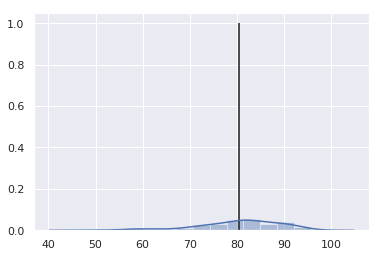

In [74]:
sns.distplot(data)
plt.vlines(np.mean(data),0,1);

Now use the right parameters to call our `bootstrap` method to obtain the sample mean $\bar{X}$ for $m$ different bootstrap samples $\{x_i\}$.

<!--
BEGIN QUESTION
name: q2b
-->

mean of bootstrap mean: 80.46616834274685 
variance of bootstrap mean: 0.38676855737537646


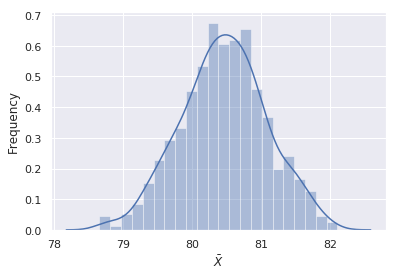

In [75]:
m = 1000  # the number of resamples 
boot_pop = np.array(data["Grade"])

boot_sample_means = bootstrap(boot_pop, np.mean, simple_resample, m)

boot_mean_mean = np.mean(boot_sample_means)
boot_var_mean = np.var(boot_sample_means)
print('mean of bootstrap mean:', boot_mean_mean, '\nvariance of bootstrap mean:', boot_var_mean)
sns.distplot(boot_sample_means)
plt.xlabel(r"$\bar{X}$")
plt.ylabel("Frequency");

In [76]:
ok.grade("q2b");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 3
    Failed: 0
[ooooooooook] 100.0% passed



Now use the right parameters to call our `bootstrap` method to obtain the standard deviation $\sqrt{\frac{1}{n}\sum_{i=1}^{n} (x_i-\bar{X})^2}$ for $m$ different bootstrap samples $\{x_i\}$. You should use `np.std`

<!--
BEGIN QUESTION
name: q2c
-->

mean of bootstrap std: 8.703891643604875 
variance of bootstrap std: 0.25638248101444466


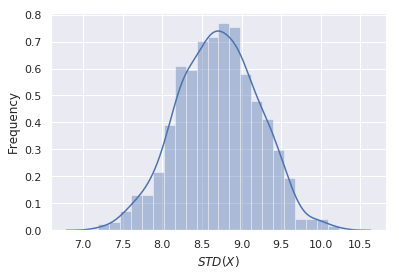

In [77]:
m = 1000
boot_pop = np.array(data["Grade"])

boot_sample_std = bootstrap(boot_pop, np.std, simple_resample, m)

boot_mean_std = np.mean(boot_sample_std)
boot_var_std = np.var(boot_sample_std)
print('mean of bootstrap std:', boot_mean_std, '\nvariance of bootstrap std:', boot_var_std)
sns.distplot(boot_sample_std)
plt.xlabel(r"$STD(X)$")
plt.ylabel("Frequency");

In [78]:
ok.grade("q2c");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 3
    Failed: 0
[ooooooooook] 100.0% passed



The true mean for the midterm grade is 80.1, and the standard deviation is 9.20.
Compare your results with them.

### Question 3
Now let's use the bootstrap method to analyze an estimator we used in the previous lab. 

Again, we use following mathematical model to predict Tips from TotalBill:

$$\Large
\texttt{Tip} = \theta  \times \texttt{TotalBill}
$$

This follows the similar intuition that tips are some **unknown** percentage of the total bill.  We will then try to estimate the slope of this relationship which corresponds to the percent tip. Here the parameter $\theta$ represents the true percent tip that we would like to estimate. We denote the estimate $\hat{\theta}$.

As we already know, we can compute the empirical risk of the squared error loss (also known as the Mean Squared Error, or MSE) as follows:
$$\Large
R_{emp}\left(m_\hat{\theta}\right) = \frac{1}{n} \sum_{i=1}^n L(m_\hat{\theta}(x_i), y_i) = \frac{1}{n} \sum_{i=1}^n (\hat{\theta} *  x_i - y_i)^2
$$

Where, $x_i$ is the TotalBill, $y_i$ is the Tips.

Then optimal $\hat{\theta}$ is:
$$\Large {\hat{\theta}} = \frac{\sum x_iy_i}{\sum x_i^2}$$

Let's use the bootstrap method to see what's the variance for this estimator.


In [79]:
data = sns.load_dataset("tips")
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


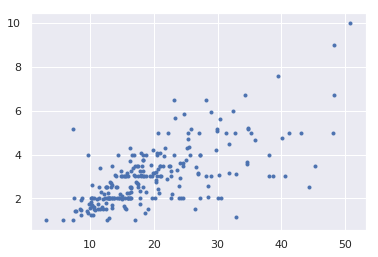

In [80]:
x = np.array(data["total_bill"])
y = np.array(data["tip"])
d = np.array((x,y)).transpose()
plt.plot(d[:,0],d[:,1],".");

Write an estimator function to compute $\hat{\theta}$ using the formula:  
$$\large {\hat{\theta}} = \frac{\sum x_iy_i}{\sum x_i^2}$$

Note that in order to do bootstrap, we need to combine `x`, `y` to into a $n \times 2$ array `d`. So `d[:,0]` is equivalent with `x` and `d[:,1]` is equivalent with `y`.

<!--
BEGIN QUESTION
name: q3a
-->

In [81]:
def estimator(d):
    """
    Args:
        d: A n*2 array which contains x and y. d[:,0] would be x, d[:,1] would be y.
        
    Returns:
        The optimal theta for this dataset under L2 loss.
    """
    x_y = np.sum(d[:,0] * d[:,1])
    x_x = np.sum(d[:,0] * d[:,0])
    return x_y/x_x

In [82]:
ok.grade("q3a");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



Now let's use our previous `bootstrap` function to obtain different estimated $\theta$. You should use the `estimator` function as the `statistic` parameter.

<!--
BEGIN QUESTION
name: q3b
-->

In [83]:
replicates = 1000

boot_theta = bootstrap(d, estimator, simple_resample, 1000)

boot_theta_mean = np.mean(boot_theta)
boot_theta_var = np.var(boot_theta)
print('mean of bootstrap theta:', boot_theta_mean, '\nvariance of bootstrap theta:', boot_theta_var)

mean of bootstrap theta: 0.1435954023770323 
variance of bootstrap theta: 1.951377780452191e-05


In [84]:
ok.grade("q3b");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 3
    Failed: 0
[ooooooooook] 100.0% passed



Finally, let's plot the distribution of `boot_theta`.

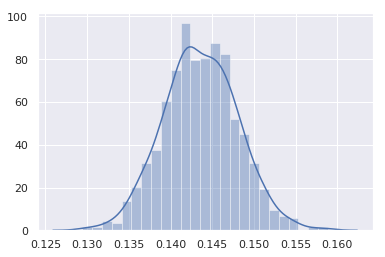

In [85]:
sns.distplot(boot_theta);

### Question 4 (Optional)

In homework 6 we used linear regression to predict housing prices in Ames, Iowa; however, what would happen if we tried to use a different prediction method? Try fitting a decision tree instead of a linear regression model for your final model in homework 6. What do you notice about the training error and the test error for the decision tree? Is one significantly larger than the other? If so, what methods could we use to make this error lower?

Now, try fitting a random forest classifier instead of a single decision tree. What do you notice about the training error and the test error for the random forest, and how does this compare to the training and test error of a single decision tree?

*Write your answer here, replacing this text.*

# Make sure to complete the Vitamin on Gradescope!

## Submission

Congrats! You are finished with this assignment. Please don't forget to submit by Wednesday at 11:59 pm!

# Submit
Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output.
**Please save before submitting!**

In [86]:
# Save your notebook first, then run this cell to submit.
ok.submit()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'lab11.ipynb'.
Submit... 100% complete
Submission successful for user: sumaanyu_maheshwari@berkeley.edu
URL: https://okpy.org/cal/data100/sp19/lab11/submissions/oV9lXB

